### Ran at following tags
MagD https://github.com/pnsn/magD/tree/v1.1.1

magd_client https://github.com/pnsn/magd_client/tree/v1.1.1

# Event Alert Window for offshore event

Analysis of the event window with current and notional station density for offshore event:
* Offshore

Analysis considers station distance to event focus

In [1]:
from magD.magD import MagD
from magD.pickle import get_pickle
import os

magd_client_path = '/Users/joncon/Sites/magd_client/'
pickle_path = magd_client_path + "/pickle_jar"
os.chdir(magd_client_path)
print('Working in ' + os.getcwd())

##some constants for all plots
#path to local magd_client


lat_min=43.0
lat_max=51.5
lon_min=-130.0
lon_max=-115.0
resolution=0.1

#number of stations to use in solution. 
num_solutions=4

# wave velocities
velocity_p = 5.4
velocity_s = 3

#Alert processing time 
processing_time = 4

#event epicenter and depth

##offshore
offshore_lat=48
offshore_lon=-125
offshore_depth = 20

##aberdeen
aberdeen_lat=47.0
aberdeen_lon=-124.0
aberdeen_depth = 55.0

#buckner
buckner_lat=48.5
buckner_lon=-121.0
buckner_depth = 10

# create all data sources icons can be changed without rebuilding magD object
data_srcs ={'offshore':
                {
                    'csv_path':'csv/eew_washington/offshore.csv',
                    'color': 'orange',
                    'symbol': '*',
                    'size': 100,
                    'label': "Offshore Event",
                    'klass': 'event'
                },
            'aberdeen':
                {
                    'csv_path':'csv/eew_washington/aberdeen.csv',
                    'color': 'orange',
                    'symbol': '*',
                    'size': 100,
                    'label': "Aberdeen",
                    'klass': 'event'
                },
            'buckner':
                {
                    'csv_path':'csv/eew_washington/buckner.csv',
                    'color': 'orange',
                    'symbol': '*',
                    'size': 100,
                    'label': "Buckner Event",
                    'klass': 'event'
                },
            'washington_current':
                {
                    'csv_path':'csv/eew_washington/eew_all_current.csv',
                    'color': 'yellow',
                    'symbol': '^',
                    'size': 50,
                    'label': "Current",
                    'unit': 'seconds',
                    'klass': 'scnl'
                },
            'washington_notional':
                {
                    'csv_path':'csv/west_coast/notional-3-27-2019.csv',
                    'color': 'red',
                    'symbol': '^',
                    'size': 50,
                    'label': "Notional",
                    'unit': 'seconds',
                    'klass': 'scnl'
                },
                
            }

def make_grid(grid_type, src, lat_min=lat_min, lat_max=lat_max, lon_min=lon_min, lon_max=lon_max):
    grid = MagD(grid_type, name, resolution, lat_min, lat_max, lon_min, lon_max, 
                   num_solutions, pickle_path)
    grid.build_markers(src)
    grid.build_origins()
    grid.build_matrix()
    grid.save()
    return grid

def make_alert_grid(dist_grid, event_grid, depth, name):
    
    print("Distance to " + str(num_solutions) + "th closet station:")
    print(dist_grid.matrix[0][0])

    station_markers = dist_grid.markers


    #from distance path, find trigger time. Use this time for every point in eq contour map
    travel_current = dist_grid.copy("travel_time", name)
    travel_current.transform_to_trigger_time(velocity_p, processing_time, depth)
#     travel_current.save()

    #trigger time (seconds)
    trigger_time= travel_current.matrix[0][0]
    print( name + " trigger time")
    print(trigger_time)

    #subtract contour grid from this value
    alert = event_grid.copy("event_warning", name)
    alert.markers =  {**station_markers, **alert.markers}
    alert.firstn_solutions = dist_grid.firstn_solutions
    alert.transform_to_s_travel_time(velocity_s, depth)
    alert.matrix =  alert.matrix -trigger_time 
    alert.matrix.clip(0)
    alert.save()
    return alert, trigger_time

Working in /Users/joncon/Sites/magd_client


In [2]:
#set book to autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Action Window for offshore event

In [3]:
# contour distance to event using full map resolution
# creates concentric circles
name ="offshore"
grid_type = 'dist_max'

src = {}
src['offshore'] = data_srcs['offshore']
%time offshore_event = make_grid(grid_type, src)
print(offshore_event.get_path())

Profiling spatially...
lat: 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, CPU times: user 260 ms, sys: 14 ms, total: 274 ms
Wall time: 274 ms
/Users/joncon/Sites/magd_client//pickle_jar/offshore/dist_max_grid/85x150-res-0.1.pickle


### Determine distance to 4th closest station

In [4]:
#Determine distance between epicenter and num_solutions (4) closest station. 
# This creates a 1x1 matrix
name ="distance_offshore_current"
grid_type = 'dist_max'

src = {}
src['washington_current'] = data_srcs['washington_current']
# since we need only a single origin, overide lat/lons
%time distance_offshore_current = make_grid(grid_type, src, offshore_lat, offshore_lat, offshore_lon, offshore_lon)
print(distance_offshore_current.get_path())

Profiling spatially...
lat: 48, CPU times: user 232 ms, sys: 4.37 ms, total: 236 ms
Wall time: 236 ms
/Users/joncon/Sites/magd_client//pickle_jar/distance_offshore_current/dist_max_grid/1x1-res-0.1.pickle


In [5]:
#Determine distance between epicenter and num_solutions (4) closest station. 
# This creates a 1x1 matrix
name ="distance_offshore_current_and_notional"
grid_type = 'dist_max'

src = {}
src['washington_current'] = data_srcs['washington_current']
src['washington_notional'] = data_srcs['washington_notional']
# since we need only a single origin, overide lat/lons
%time distance_offshore_current_and_notional = make_grid(grid_type, src, offshore_lat, offshore_lat, \
                                                  offshore_lon, offshore_lon)
print(distance_offshore_current_and_notional.get_path())

Profiling spatially...
lat: 48, CPU times: user 610 ms, sys: 4.26 ms, total: 614 ms
Wall time: 613 ms
/Users/joncon/Sites/magd_client//pickle_jar/distance_offshore_current_and_notional/dist_max_grid/1x1-res-0.1.pickle


### Create Alert Grids

In [6]:
# offshore current
offshore_alert_current, tc = make_alert_grid(distance_offshore_current, offshore_event,\
                                offshore_depth, 'offshore')
offshore_alert_current_path = offshore_alert_current.get_path()

# # current and notional
offshore_alert_current_and_notional, tn = make_alert_grid(distance_offshore_current_and_notional,\
                                                      offshore_event, offshore_depth, 'offshore_n')
offshore_alert_current_and_notional_path = offshore_alert_current_and_notional.get_path()

#diff

diff_offshore_alert = offshore_alert_current_and_notional.copy("event_warning_diff", "diff_offshore20")
diff_offshore_alert.matrix =  offshore_alert_current_and_notional.matrix.clip(0) -  \
                                   offshore_alert_current.matrix.clip(0)

diff_offshore_alert.matrix.clip(0)
diff_offshore_alert.save()
diff_offshore_alert_path = diff_offshore_alert.get_path()
delta_trigger = round(tc - tn, 2)
print("time delta =" + str(delta_trigger))
print(diff_offshore_alert_path)

Distance to 4th closet station:
67.1797465573
offshore trigger time
16.980303676
Distance to 4th closet station:
42.9855724319
offshore_n trigger time
12.7797298917
time delta =4.2
/Users/joncon/Sites/magd_client//pickle_jar/diff_offshore20/event_warning_diff_grid/85x150-res-0.1.pickle


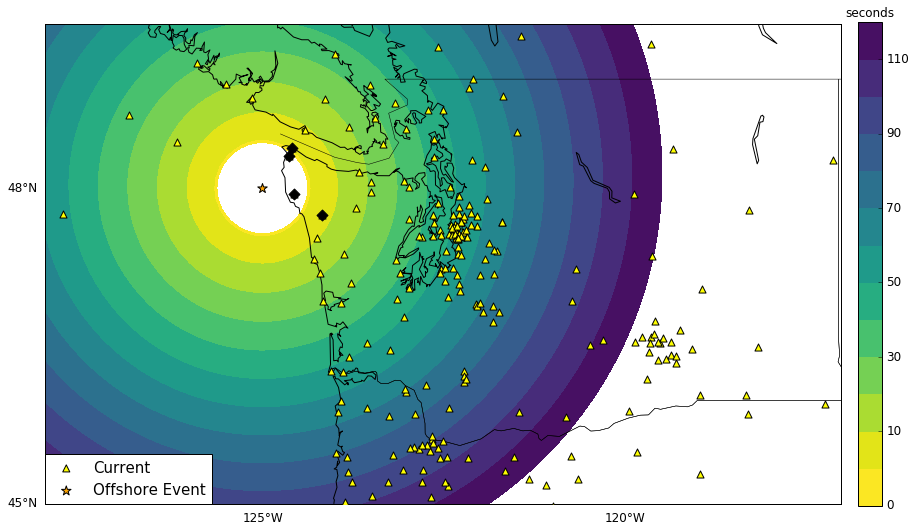

In [100]:
%run -i scripts/plot_heatmap.py \
--path=$offshore_alert_current_path \
--plotstas=True \
--plotwidth=15 \
--plotheight=10 \
--color=viridis_r \
--legend_pad=0 \
--colorbar_pad=0.02 \
--colorbar_fraction=0.0289 \
--levels=0,1,10,20,30,40,50,60,70,80,90,100,110,120

# clb = pm.plot().colorbar(cf, fraction=0.028, pad=float(args.colorbar_pad))
# --title1="Action Window(seconds) for Offshore Event" \
# --title2="Current Stations" \

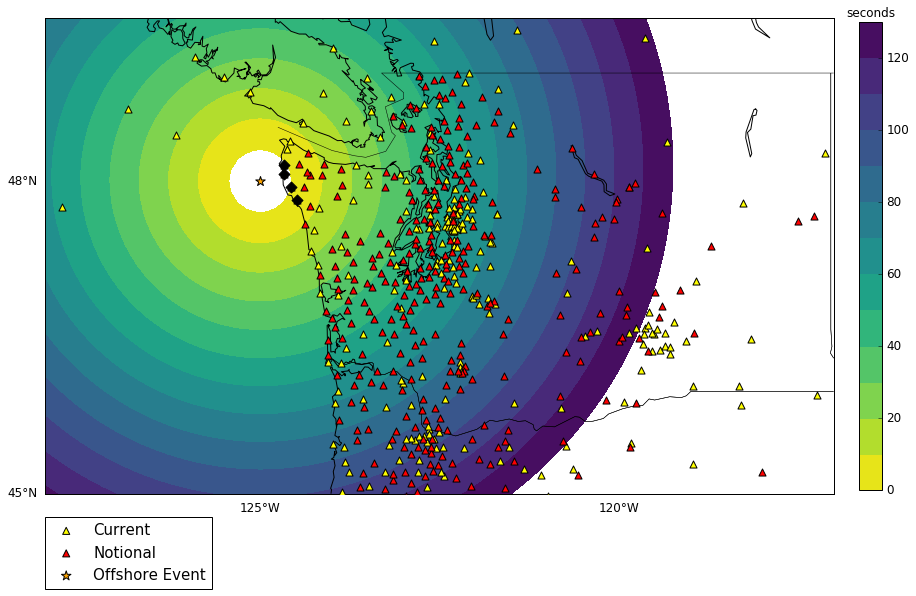

In [76]:
%run -i scripts/plot_heatmap.py \
--path=$offshore_alert_current_and_notional_path \
--plotstas=True \
--plotwidth=15 \
--plotheight=10 \
--color=viridis_r \
--legend_pad=-0.2 \
--colorbar_pad=0.03 \
--levels=0,10,20,30,40,50,60,70,80,90,100,110,120,130

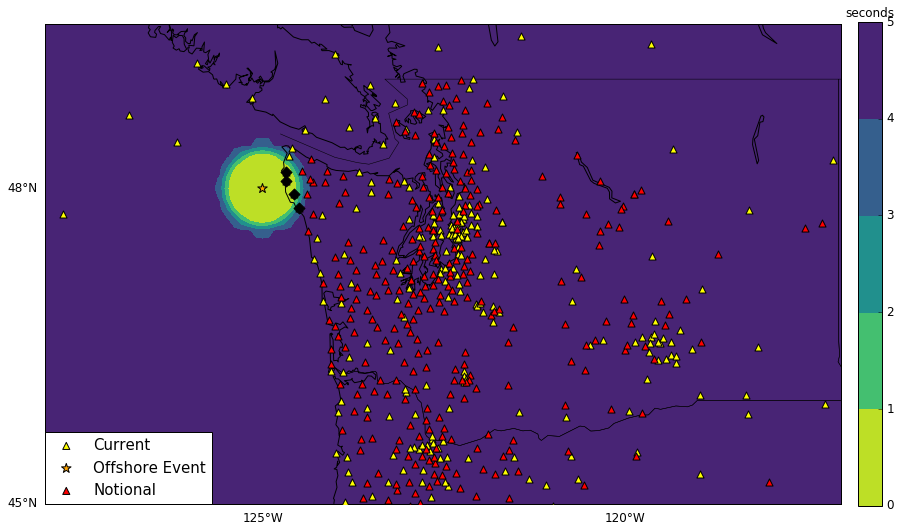

In [99]:
%run -i scripts/plot_heatmap.py \
--path=$diff_offshore_alert_path \
--plotstas=True \
--plotwidth=15 \
--plotheight=10 \
--color=viridis_r \
--legend_pad=0 \
--colorbar_pad=0.02 \
--colorbar_fraction=0.0289 \
--levels=0,1,2,3,4,5

#--title1="Diff Action Window(seconds) for Offshore Event" \
#--title2="Notional Improvement" \
#--title3=$delta_trigger \